<a href="https://colab.research.google.com/github/DevCielo/background_generator/blob/main/DogVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook builds an end-to-end multi-class image classifier using Tensorflow 2.0 and Tensorflow Hub

**1. Problem**
Identifying the breed of a dog given an image of a dog.

**2. Data**
The data we are using is from Kaggle's dogbreed evaluation problem.

**3. Evaluation**
The evaluation is a file with prediction probabilities for each dog breed of each test image.

**4. Features**
Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep-learning/transfer-learning
* There are 120 different breeds of dogs and therefore there are 120 different classes
* There are around 10000+ images in the training set (these images have labels)
* There are around 10000+ images in the test set (these images have no labels as we are testing them)

In [ ]:
#!unzip "drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog_Vision/"

### **Get our workspace ready**

* Import Tensorflow 2.x
* Import Tensorflow Hub
* Make sure we are using GPU

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)

# Check for GPU Availability
print("GPU", "available (YESSSSSSS)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF Version: 2.15.0
TF Hub Version: 0.16.1
GPU not available :(


In [ ]:
## Getting our data ready

import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog_Vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


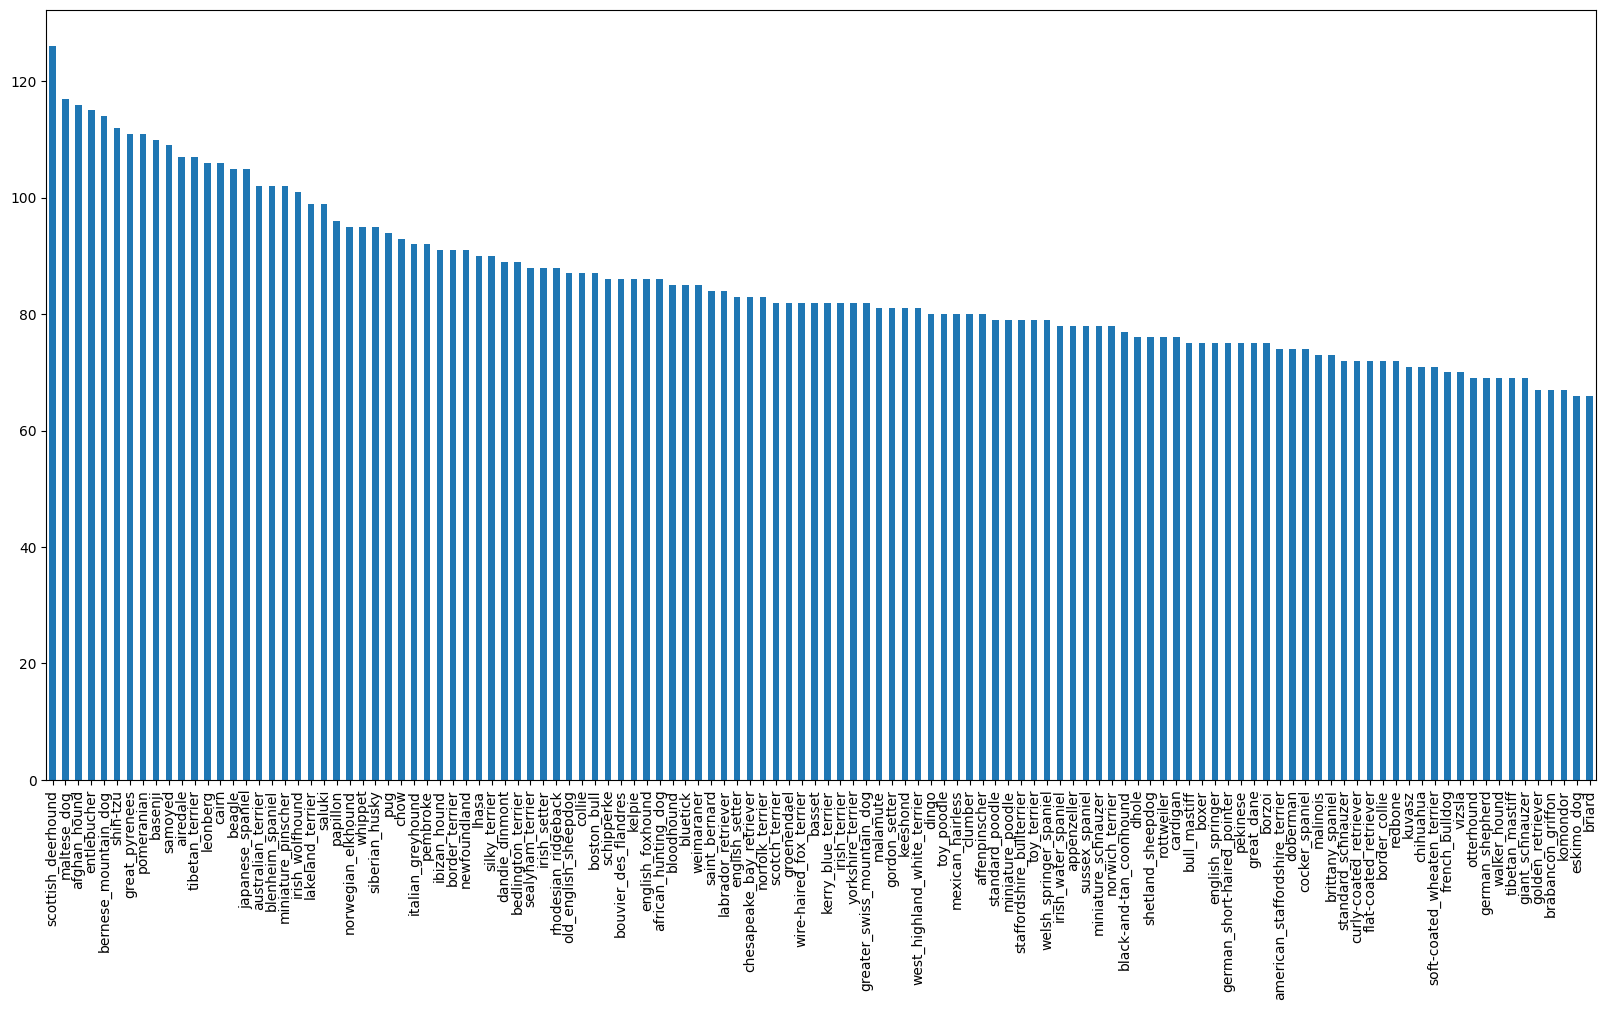

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
from IPython.display import display, Image
#Image("drive/MyDrive/Dog_Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

**Getting images and their labels**

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filenames = ["drive/MyDrive/Dog_Vision/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['drive/MyDrive/Dog_Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("drive/MyDrive/Dog_Vision/dog-breed-identification/train/")) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames do not match actual amount of files")

print(len(os.listdir("drive/MyDrive/Dog_Vision/dog-breed-identification/train/")))
print(len(filenames))

Filenames do not match actual amount of files
10282
10222


In [ ]:
labels_csv["breed"][10221]

'chesapeake_bay_retriever'

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames


In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
print(labels[0])

boston_bull


In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# turning boolean arrays into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/Dog_Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

# Creating our own validation set

In [ ]:
# Setup x and y labels
X = filenames
y = boolean_labels # standard variable for label


In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:2], y_train[:2]

(['drive/MyDrive/Dog_Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog_Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fa

# Preprocessing Images (turning images into Tensors)

In [ ]:
# Convert an image to a numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [ ]:
# Define Image Size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  # read in an image file
  image = tf.io.read_file(image_path)

  # turn the jpeg image into numerical tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image





In [ ]:
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tf.image.decode_jpeg(tensor, channels=3)

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

# Turning our data into batches

In [ ]:
# create a simple function to return a tuple of tensors
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Creating training and validation data
train_data = create_data_batches(X_train, y_train)
valid_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Checkout the different attributes of the data batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    # gets rid of grid to make it look better
    plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[3.10574248e-02, 3.49789932e-02, 1.53711485e-02],
          [1.52916647e-02, 1.92132331e-02, 0.00000000e+00],
          [2.21288651e-02, 2.60504354e-02, 6.44259015e-03],
          ...,
          [5.06652892e-02, 4.28221487e-02, 4.67437208e-02],
          [5.09803966e-02, 4.70588282e-02, 3.80251445e-02],
          [5.09803966e-02, 4.70588282e-02, 3.13725509e-02]],
 
         [[3.50059569e-02, 3.89275253e-02, 1.93196815e-02],
          [1.96516123e-02, 2.35731825e-02, 3.96533683e-03],
          [2.17664521e-02, 2.56880224e-02, 6.08017761e-03],
          ...,
          [5.06652892e-02, 4.28221487e-02, 4.67437208e-02],
          [5.09803966e-02, 4.70588282e-02, 3.80251445e-02],
          [5.09803966e-02, 4.70588282e-02, 3.13725509e-02]],
 
         [[4.00822833e-02, 4.40038517e-02, 2.43960097e-02],
          [2.62167398e-02, 3.01383082e-02, 1.05304634e-02],
          [1.73610933e-02, 2.12826617e-02, 1.67481916e-03],
          ...,
          [5.06652892e-02, 4.28221487e-02, 4.6743

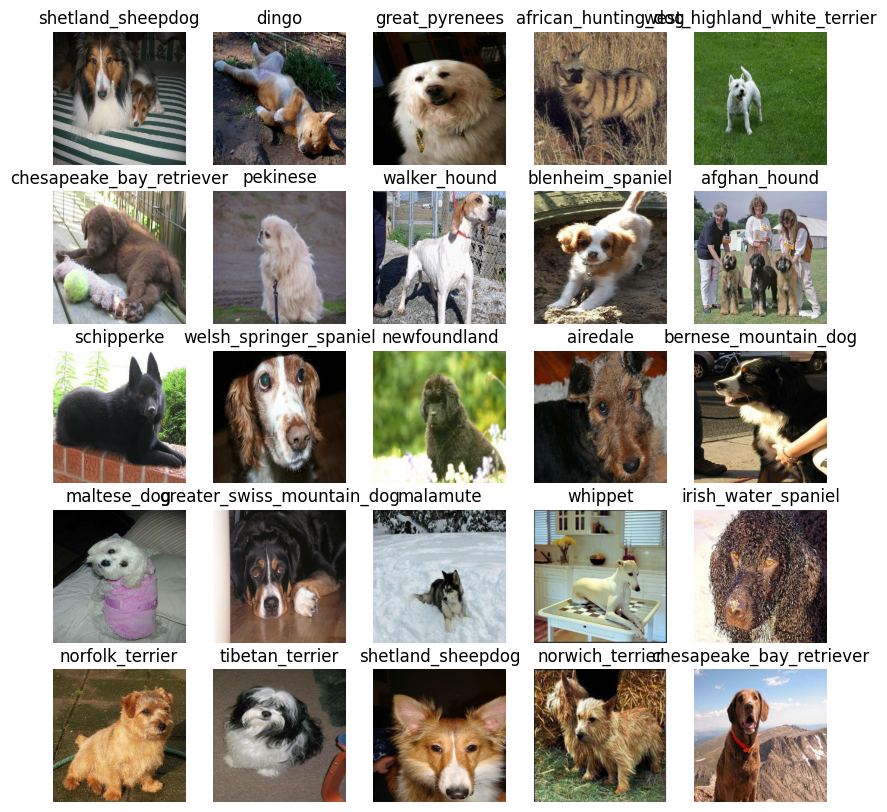

In [ ]:
# Now let's visualize the data in a training batch
show_25_images(train_images, train_labels)

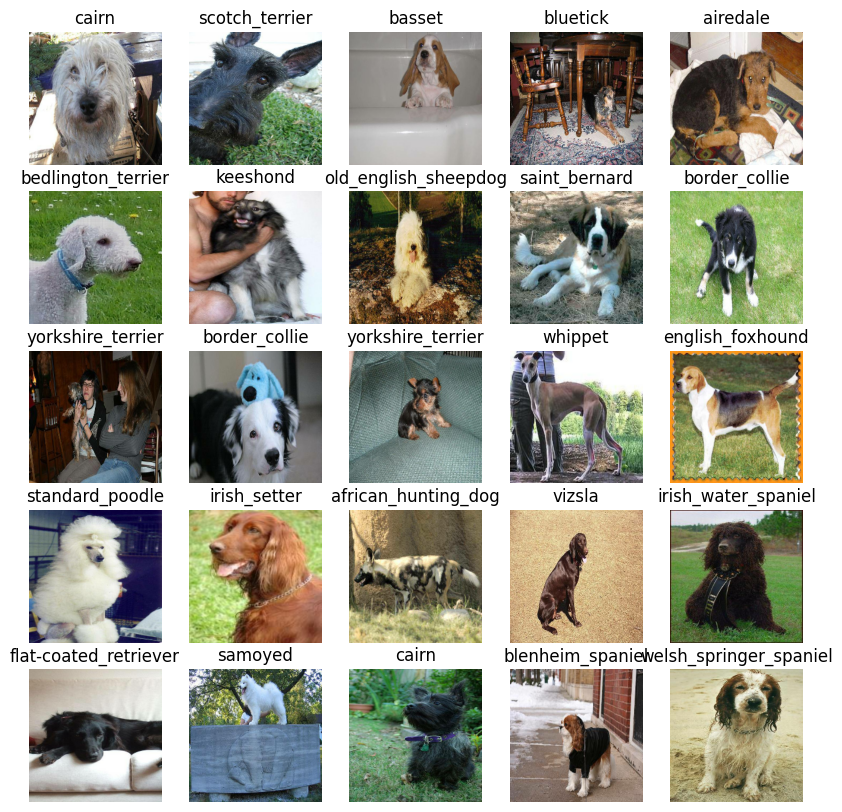

In [ ]:
# Now let's visualize the data in our validation set
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Building a model

* We need to define the inputs shape (in the form of Tensors)
* We need to define the output shape (in the form of Tensors)
* The URL of the model

In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, colour channels
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL From tensorflow hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1"


In [ ]:
# Create a function that builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print('Building Model with', MODEL_URL)

  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer 1 (Input Layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") #Layer 2 (Output Layer)

  ])

  #Compile the model
  model.compile(
      # Measures how wrong the robots guesses are
      loss=tf.keras.losses.CategoricalCrossentropy(),
      # Adam optimizer essentially tells robot how to fix its error for next time
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building Model with https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


# Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if it stops improving (before it overfits)

In [ ]:
# Tensorboard
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  # Create a log directory for storing tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog_Vision/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

# Early Stopping Callback

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

# Training a model

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


In [ ]:
def train_model():
  # Create a model
  model = create_model()

  # Create new Tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data = valid_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])

  return model


In [ ]:
model = train_model()

Building Model with https://kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/1
Epoch 1/100
25/25 [==============================] - 415s 16s/step - loss: 4.6227 - accuracy: 0.1025 - val_loss: 3.5449 - val_accuracy: 0.2750
Epoch 2/100
25/25 [==============================] - 5s 198ms/step - loss: 1.6521 - accuracy: 0.6850 - val_loss: 2.2250 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 5s 189ms/step - loss: 0.5710 - accuracy: 0.9400 - val_loss: 1.6896 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 8s 312ms/step - loss: 0.2521 - accuracy: 0.9925 - val_loss: 1.5158 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 7s 279ms/step - loss: 0.1442 - accuracy: 1.0000 - val_loss: 1.4262 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 168ms/step - loss: 0.0997 - accuracy: 1.0000 - val_loss: 1.3847 - val_accuracy: 0.6450
Epoch 7/

It looks like our model is overfitting because its performing far better on our training set than our validation set, what are some ways to prevent our model from overfitting in deep learning neural networks?

Overfitting to begin with is a good thing it means our model is learning.

In [ ]:
# Checking the tensorboard logs (only works on google chrome)
%tensorboard --logdir drive/MyDrive/Dog_Vision/logs

# Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data
predictions = model.predict(valid_data, verbose=1)
predictions

5/7 [====================>.........] - ETA: 30s

In [ ]:
predictions[0]

In [ ]:
predictions.shape

In [ ]:
# First prediction
print(predictions[0])

In [ ]:
print(f"Max value (probability of prediction): ", {np.max(predictions[0])})
print(f"Sum: ", {np.sum(predictions[0])})
print(f"Max index: ", {np.argmax(predictions[0])})
print(f"Predicted label: ", {unique_breeds[np.argmax(predictions[0])]})

In [ ]:
# Turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  images = []
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

valid_images, valid_labels = unbatchify(valid_data)
valid_images[0], valid_labels[0]

In [ ]:
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in valid_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]


In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get prediction label
  pred_label = get_pred_label(pred_prob)

  # plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title(f"{pred_label} {np.max(pred_prob)*100:2.0f}% {true_label}", color=color)



In [ ]:
plot_pred(prediction_probabilities=predictions, labels=valid_labels, images=valid_images, n=53)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence intexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values, color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), labels=top_10_pred_labels, rotation="vertical")

  # Change the colour of the true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions, labels=valid_labels, n=5)

In [ ]:
# Lets check a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions, labels=valid_labels, images=valid_images, n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions, labels=valid_labels, n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Saving and reloading a model

In [ ]:
def save_model(model, suffix=None):
  #Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog_Vision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5"
  print(f"Saving model to: {model_path}...")

  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a model
def load_model(model_path):
  print(f"Loading a saved model from: {model_path}...")
  model = tf.keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})

  return model

In [ ]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
loaded_1000_image_model = load_model('drive/MyDrive/Dog_Vision/models/20240401-04531711947183-1000-images-mobilenetv2-Adam.h5')

Loading a saved model from: drive/MyDrive/Dog_Vision/models/20240401-04531711947183-1000-images-mobilenetv2-Adam.h5...


In [ ]:
model.evaluate(valid_data)

7/7 [==============================] - 1s 121ms/step - loss: 1.2620 - accuracy: 0.6800


[1.2620480060577393, 0.6800000071525574]

In [ ]:
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 1s 111ms/step - loss: 1.3219 - accuracy: 0.6500


[1.3218564987182617, 0.6499999761581421]

# Training a big model

In [ ]:
len(X), len(y)

In [ ]:
full_data = create_data_batches(X, y)
full_data

In [ ]:
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [ ]:
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])


Epoch 1/100
 43/320 [===>..........................] - ETA: 56:36 - loss: 3.8551 - accuracy: 0.2144

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
# Load in the full model
loaded_full_model = load_model("path")


# Making predictions on the test data set

In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog_Vision/dog-breed-identification/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)
test_data

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data, verbose=1)

In [ ]:
np.savetxt('drive/MyDrive/Dog_Vision/dog-breed-identification/preds_array.csv', test_predictions, delimeter=",")

In [1]:
test_predictions = np.loadtxt("drive/MyDrive/Dog_vision/dog-breed-identification/preds_array.csv")
test_predictions[:10]

NameError: name 'np' is not defined